# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

In [20]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import pickle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

## Load Data

In [21]:
## define a function that translat the string into float in the array
def trans_str2int(strlist):
    intlist = []
    for i in range(len(strlist)):
        intlist.append([])
        for j in range(len(strlist[i])):
            intlist[i].append(int(strlist[i][j]))
    return np.array(intlist)

X_str = []
Y = []
print('Reading in the training data......')
with open('./data/train.csv') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        Y.append(line[0])
        image = np.array(line[1:])
        X_str.append(image)
    del X_str[0]
    del Y[0]

print('Reading in the testing data......')
x_test_str = []
with open('./data/test.csv') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        image = np.array(line)
        x_test_str.append(image)
    del x_test_str[0]

Y = trans_str2int(Y).reshape(-1)
X = trans_str2int(X_str)
X_test = trans_str2int(x_test_str)
print('Finish!')

Reading in the training data......
Reading in the testing data......
Finish!


In [22]:
def reshape_array(data):
    ret = []
    for j in range(len(data)):
        ret.append(data[j].reshape((28,28,1)))
    return np.array(ret)

print('Reshaping the data......')

X = reshape_array(X)
X_test = reshape_array(X_test)

print('Spliting the training data into training and valid......')
## split the train data into training and validation part to check the model
## validation set takes 3% data from the whole training data 
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=1)
print('Finish!')

Reshaping the data......
Spliting the training data into training and valid......
Finish!


In [23]:
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (28, 28, 1)

Training Set:   33600 samples
Validation Set: 8400 samples
Test Set:       28000 samples


The data comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

In [24]:
import numpy as np

# Pad images with 0s
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_valid = np.pad(X_valid, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test  = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


## Visualize Data

View a sample from the dataset.

1


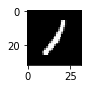

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## Normalize the data

In [26]:
X_train = (X_train - 128)/256
X_valid = (X_valid - 128)/256
X_test = (X_test - 128)/256

## Save the data

In [27]:
data_dict = {'X_train': X_train, 'y_train': y_train, 'X_valid': X_valid, 'y_valid': y_valid, 'X_test': X_test}

with open('project_data.pickle', 'wb') as file:
    pickle.dump(data_dict,file)

In [28]:
with open('project_data.pickle', 'rb') as file:
    data_dict =  pickle.load(file)
    X_train = data_dict['X_train']
    y_train = data_dict['y_train']
    X_valid = data_dict['X_valid']
    y_valid = data_dict['y_valid']
    X_test = data_dict['X_test']

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [29]:
EPOCHS = 30
BATCH_SIZE = 256

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [49]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    wc1 = tf.Variable(tf.truncated_normal([5,5,1,6],mu,sigma))
    bc1 = tf.Variable(tf.truncated_normal([6],mu,sigma))
    strides1 = [1,1,1,1]
    padding1 = 'VALID'
    
    conv1 = tf.nn.conv2d(x,wc1,strides1,padding1)
    conv1 = tf.nn.bias_add(conv1,bc1)

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize1 = [1,2,2,1]
    strides1 = [1,2,2,1]
    padding1 = 'VALID'
    layer1 = tf.nn.max_pool(conv1,ksize1,strides1,padding1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    wc2 = tf.Variable(tf.truncated_normal([5,5,6,16],mu,sigma))
    bc2 = tf.Variable(tf.truncated_normal([16],mu,sigma))
    strides2 = [1,1,1,1]
    padding2 = 'VALID'
    
    conv2 = tf.nn.conv2d(layer1,wc2,strides2,padding2)
    conv2 = tf.nn.bias_add(conv2,bc2)
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    ksize2 = [1,2,2,1]
    strides2 = [1,2,2,1]
    padding2 = 'VALID'
    layer2 = tf.nn.max_pool(conv2,ksize2,strides2,padding2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv3 = tf.contrib.layers.flatten(layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    wc3 = tf.Variable(tf.truncated_normal([400,120],mu,sigma))
    bc3 = tf.Variable(tf.truncated_normal([120],mu,sigma))
    conv3 = tf.add(tf.matmul(conv3,wc3),bc3)
    
    # TODO: Activation.
    layer3 = tf.nn.relu(conv3)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    wc4 = tf.Variable(tf.truncated_normal([120,84],mu,sigma))
    bc4 = tf.Variable(tf.truncated_normal([84],mu,sigma))
    conv4 = tf.add(tf.matmul(conv4,wc4),bc4)
    
    # TODO: Activation.
    layer4 = tf.nn.relu(layer4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    wc5 = tf.Variable(tf.truncated_normal([84,10],mu,sigma))
    bc5 = tf.Variable(tf.truncated_normal([10],mu,sigma))
    logits = tf.add(tf.matmul(layer4,wc5),bc5) 
    
    return logits

## Features and Labels
Train LeNet to classify data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [50]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [32]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [96]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.944

EPOCH 2 ...
Validation Accuracy = 0.958

EPOCH 3 ...
Validation Accuracy = 0.972

EPOCH 4 ...
Validation Accuracy = 0.978

EPOCH 5 ...
Validation Accuracy = 0.979

EPOCH 6 ...
Validation Accuracy = 0.982

EPOCH 7 ...
Validation Accuracy = 0.983

EPOCH 8 ...
Validation Accuracy = 0.983

EPOCH 9 ...
Validation Accuracy = 0.984

EPOCH 10 ...
Validation Accuracy = 0.986

EPOCH 11 ...
Validation Accuracy = 0.983

EPOCH 12 ...
Validation Accuracy = 0.983

EPOCH 13 ...
Validation Accuracy = 0.984

EPOCH 14 ...
Validation Accuracy = 0.983

EPOCH 15 ...
Validation Accuracy = 0.985

EPOCH 16 ...
Validation Accuracy = 0.985

EPOCH 17 ...
Validation Accuracy = 0.985

EPOCH 18 ...
Validation Accuracy = 0.986

EPOCH 19 ...
Validation Accuracy = 0.983

EPOCH 20 ...
Validation Accuracy = 0.983

EPOCH 21 ...
Validation Accuracy = 0.986

EPOCH 22 ...
Validation Accuracy = 0.986

EPOCH 23 ...
Validation Accuracy = 0.985

EPOCH 24 ...
Validation Accura

## Evaluate the Model

In [34]:
images = []

for i in range(50):
    j = random.randint(0, len(X_test))
    images.append(X_test[j])
    
predict = tf.argmax(logits, 1)


INFO:tensorflow:Restoring parameters from .\lenet


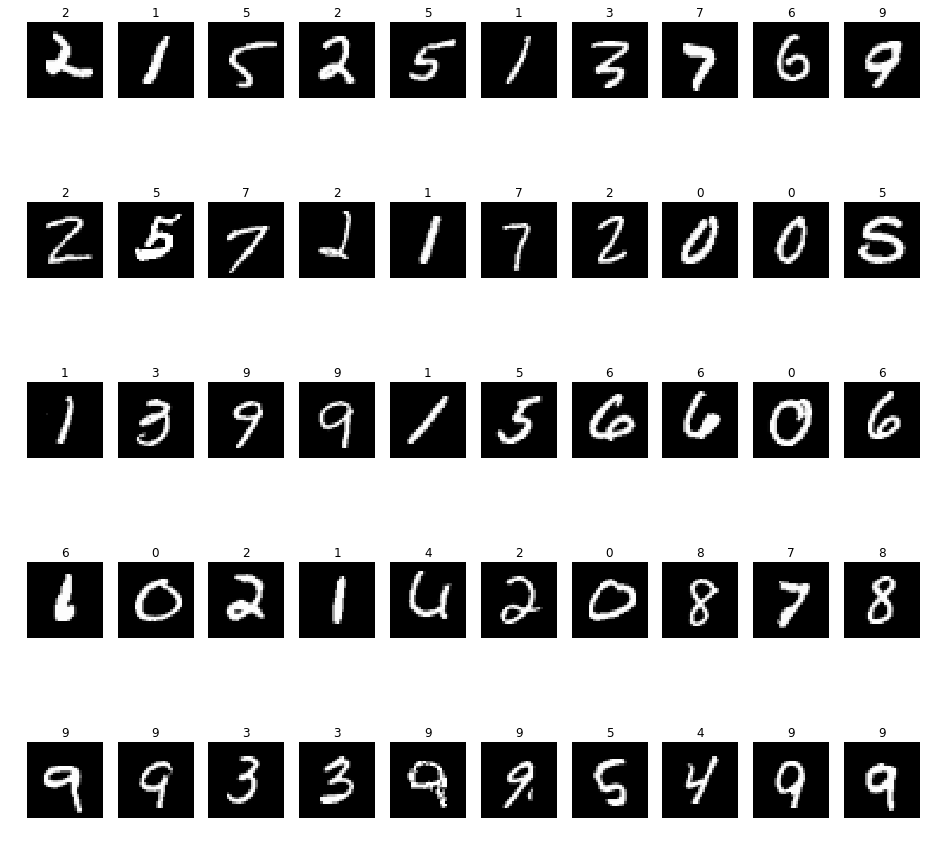

In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(predict, feed_dict={x: images})
    plt.figure(figsize=(16, 16))
    for i in range(len(images)):
        plt.subplot(5,10,i+1).axis('off')
        plt.title(str(prediction[i]))
        plt.imshow(images[i].squeeze(), cmap='gray')

## Output the top 5 softmaxs

INFO:tensorflow:Restoring parameters from .\lenet
top 5:  TopKV2(values=array([[1.0000000e+00, 1.2835268e-10, 1.2432848e-10, 1.2531966e-13,
        1.3292901e-15]], dtype=float32), indices=array([[2, 1, 4, 7, 6]]))


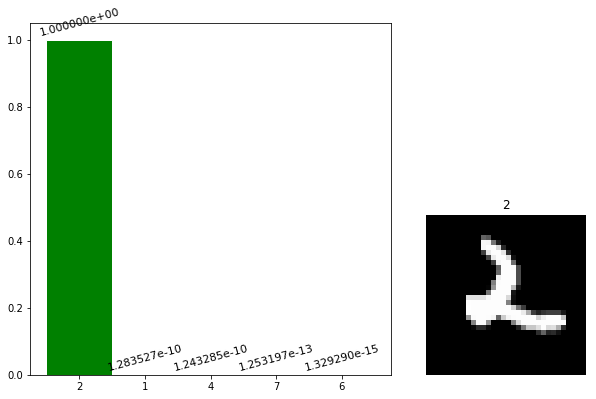

top 5:  TopKV2(values=array([[9.9999988e-01, 1.0586309e-07, 5.8797345e-10, 6.0343501e-11,
        3.1246502e-11]], dtype=float32), indices=array([[1, 4, 7, 8, 2]]))


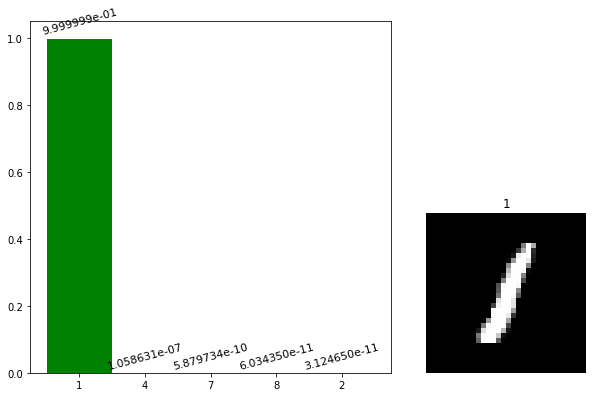

top 5:  TopKV2(values=array([[1.0000000e+00, 5.7008787e-10, 1.9685585e-11, 3.7287000e-14,
        1.9142152e-14]], dtype=float32), indices=array([[5, 8, 6, 4, 7]]))


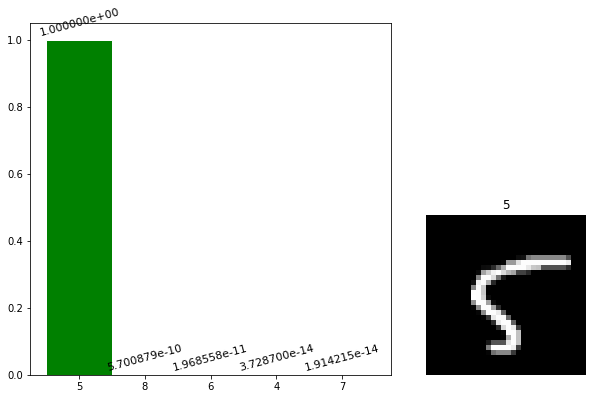

top 5:  TopKV2(values=array([[1.0000000e+00, 4.4783421e-10, 3.3953778e-13, 5.3951564e-14,
        5.9805251e-17]], dtype=float32), indices=array([[2, 7, 1, 3, 8]]))


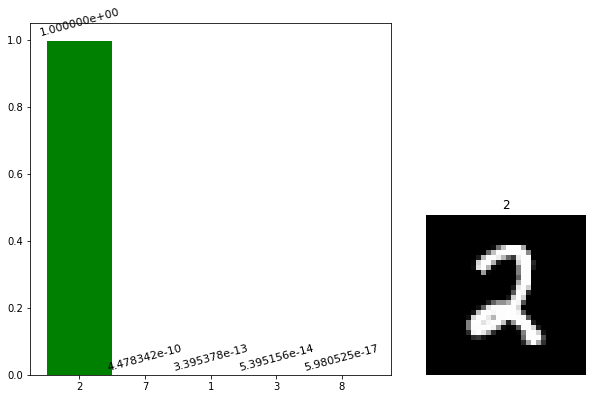

top 5:  TopKV2(values=array([[1.0000000e+00, 3.4387891e-14, 3.2293219e-14, 4.8292504e-16,
        1.0905356e-17]], dtype=float32), indices=array([[5, 9, 6, 3, 8]]))


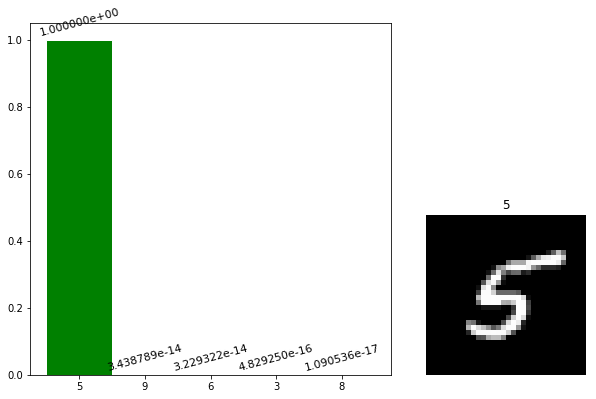

top 5:  TopKV2(values=array([[9.9997318e-01, 2.1870026e-05, 4.5222687e-06, 4.8328377e-07,
        5.7763632e-08]], dtype=float32), indices=array([[1, 4, 2, 7, 8]]))


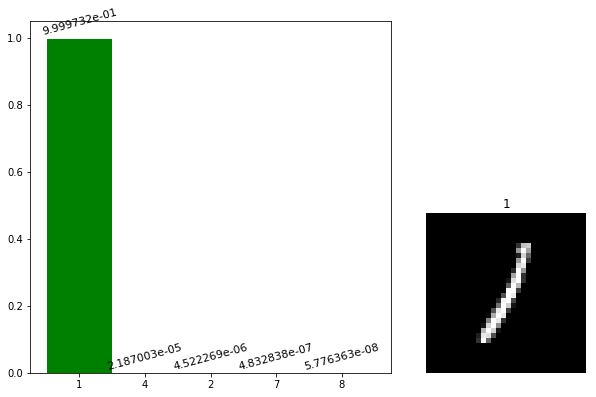

top 5:  TopKV2(values=array([[9.9999988e-01, 7.3094341e-08, 1.2010482e-12, 1.5290072e-13,
        4.4051574e-16]], dtype=float32), indices=array([[3, 8, 7, 2, 5]]))


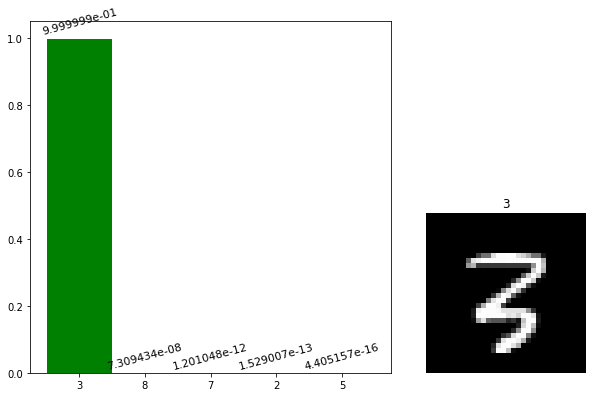

top 5:  TopKV2(values=array([[1.0000000e+00, 2.7022957e-09, 2.6025532e-12, 5.4189411e-13,
        1.7539789e-13]], dtype=float32), indices=array([[7, 9, 2, 1, 0]]))


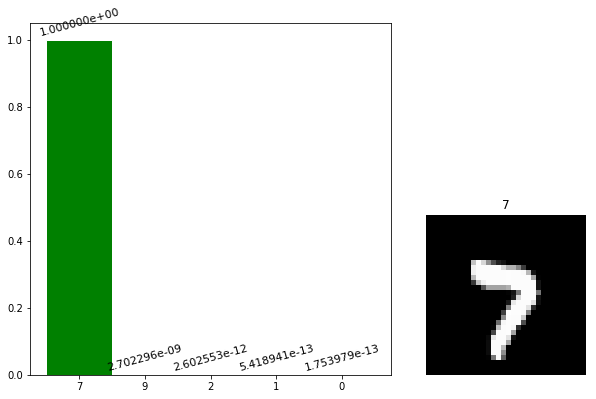

top 5:  TopKV2(values=array([[1.0000000e+00, 1.1948336e-08, 2.4599427e-09, 6.0944905e-10,
        5.5831194e-11]], dtype=float32), indices=array([[6, 5, 0, 8, 9]]))


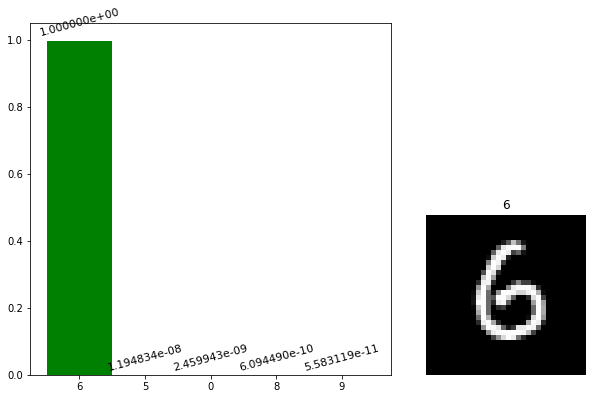

top 5:  TopKV2(values=array([[1.0000000e+00, 4.2299203e-10, 7.3740208e-11, 1.8254835e-11,
        4.2144920e-13]], dtype=float32), indices=array([[9, 4, 7, 8, 3]]))


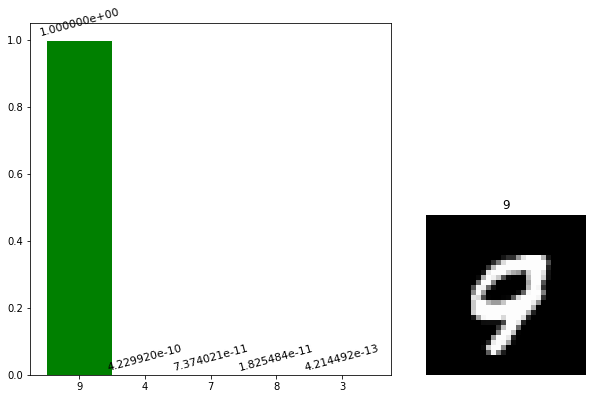

top 5:  TopKV2(values=array([[1.0000000e+00, 1.0840510e-09, 5.4485494e-10, 1.1125868e-11,
        4.0237809e-14]], dtype=float32), indices=array([[2, 1, 3, 7, 8]]))


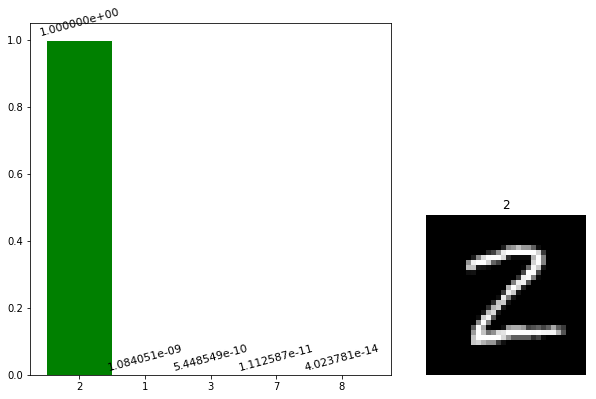

top 5:  TopKV2(values=array([[9.9999869e-01, 1.3652075e-06, 1.2146568e-13, 7.2087442e-15,
        2.6684183e-15]], dtype=float32), indices=array([[5, 6, 3, 0, 8]]))


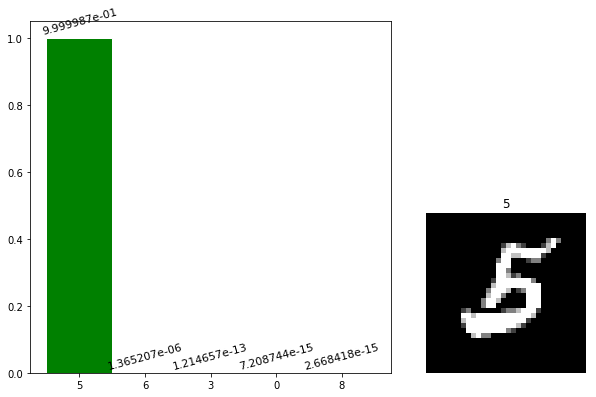

top 5:  TopKV2(values=array([[1.0000000e+00, 3.5297276e-08, 9.4778532e-09, 5.4555242e-11,
        5.0459970e-11]], dtype=float32), indices=array([[7, 9, 2, 4, 3]]))


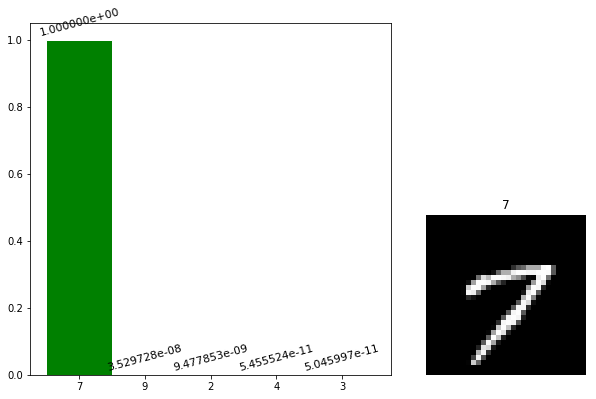

top 5:  TopKV2(values=array([[9.935587e-01, 6.342347e-03, 9.846024e-05, 4.123784e-07,
        8.518954e-08]], dtype=float32), indices=array([[2, 4, 1, 6, 3]]))


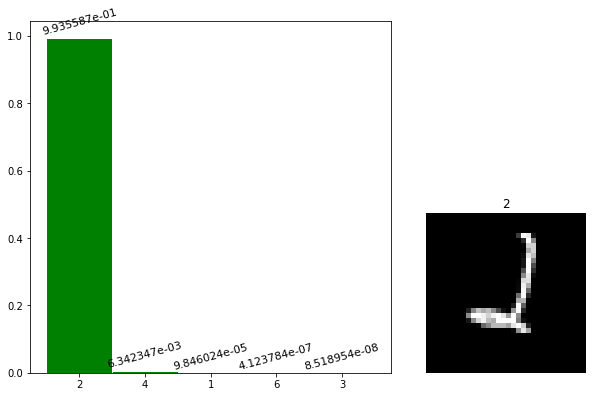

top 5:  TopKV2(values=array([[9.9999952e-01, 3.2354203e-07, 1.3245307e-07, 7.4720657e-10,
        4.4610424e-10]], dtype=float32), indices=array([[1, 7, 4, 8, 2]]))


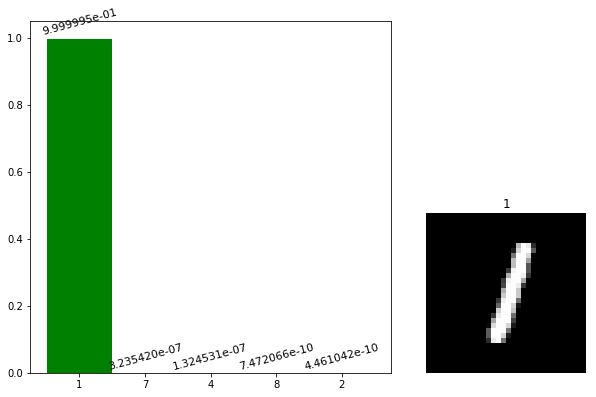

top 5:  TopKV2(values=array([[9.9999368e-01, 5.5651258e-06, 6.7687472e-07, 7.3849634e-08,
        1.8024945e-08]], dtype=float32), indices=array([[7, 2, 1, 3, 9]]))


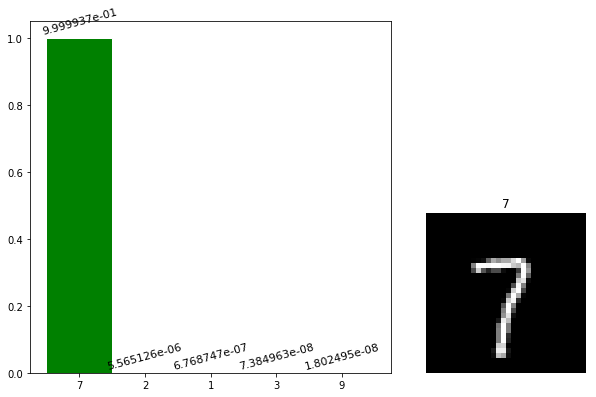

top 5:  TopKV2(values=array([[1.0000000e+00, 3.9574433e-09, 1.1607122e-09, 1.9753522e-10,
        1.9452429e-10]], dtype=float32), indices=array([[2, 1, 7, 3, 8]]))


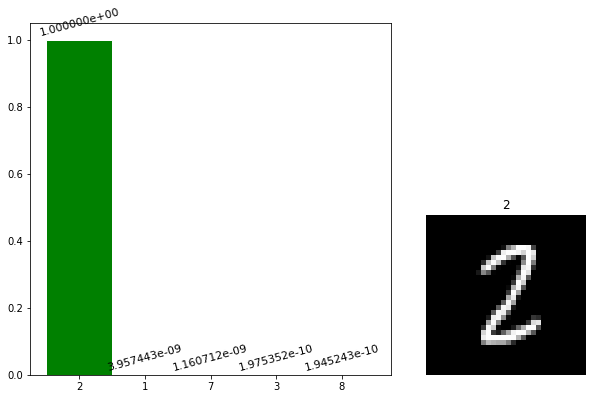

top 5:  TopKV2(values=array([[9.9999988e-01, 1.3943257e-07, 1.4068665e-09, 5.2828286e-10,
        4.3823487e-11]], dtype=float32), indices=array([[0, 2, 8, 4, 9]]))


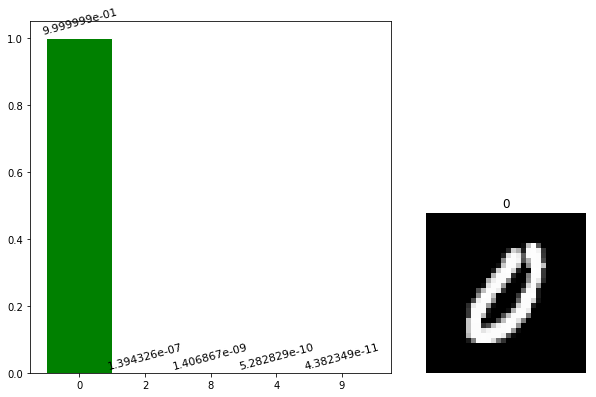

top 5:  TopKV2(values=array([[1.0000000e+00, 8.0999438e-09, 4.1399595e-09, 2.5752949e-09,
        1.0677842e-12]], dtype=float32), indices=array([[0, 8, 9, 2, 4]]))


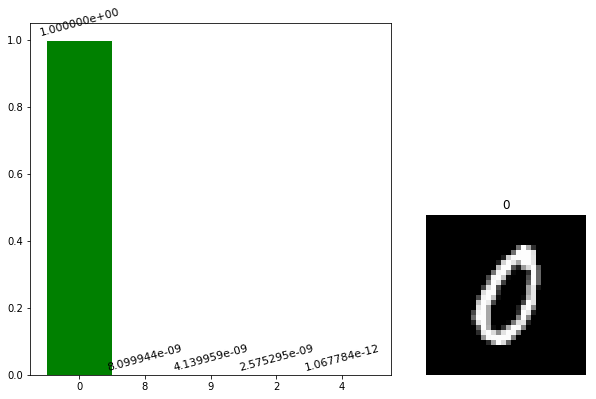

top 5:  TopKV2(values=array([[1.000000e+00, 4.877141e-10, 1.986483e-10, 8.414968e-12,
        7.564409e-12]], dtype=float32), indices=array([[5, 8, 3, 6, 9]]))


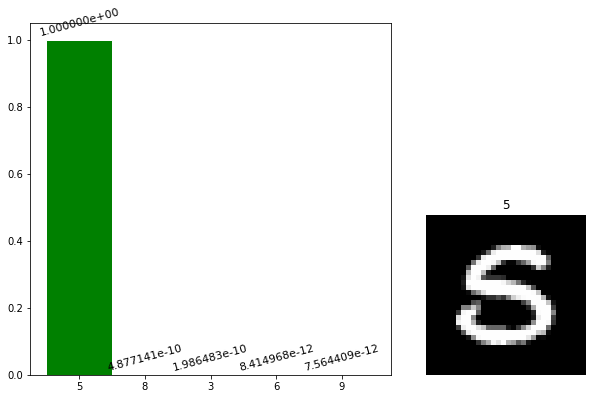

top 5:  TopKV2(values=array([[9.9975568e-01, 2.2887687e-04, 7.4756399e-06, 7.3261622e-06,
        6.8725751e-07]], dtype=float32), indices=array([[1, 7, 2, 4, 8]]))


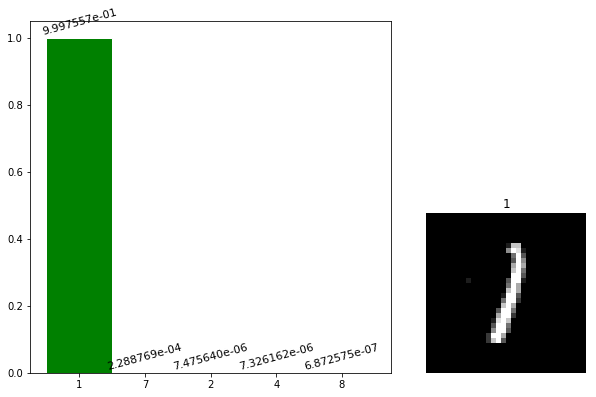

top 5:  TopKV2(values=array([[1.0000000e+00, 1.4349677e-09, 5.1397064e-10, 2.8795678e-11,
        4.3991528e-13]], dtype=float32), indices=array([[3, 7, 8, 2, 9]]))


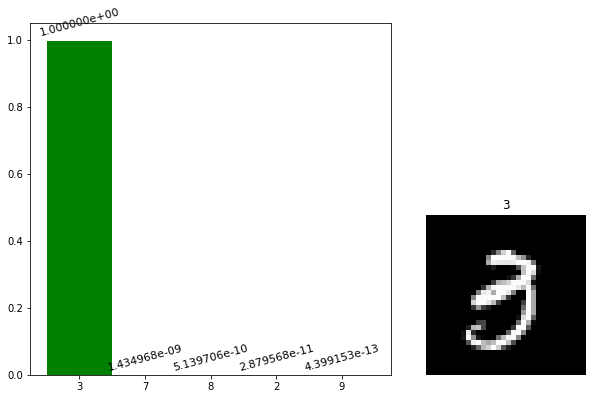

top 5:  TopKV2(values=array([[1.0000000e+00, 3.2620353e-09, 7.1109896e-11, 3.9815914e-11,
        2.6958529e-11]], dtype=float32), indices=array([[9, 8, 4, 2, 7]]))


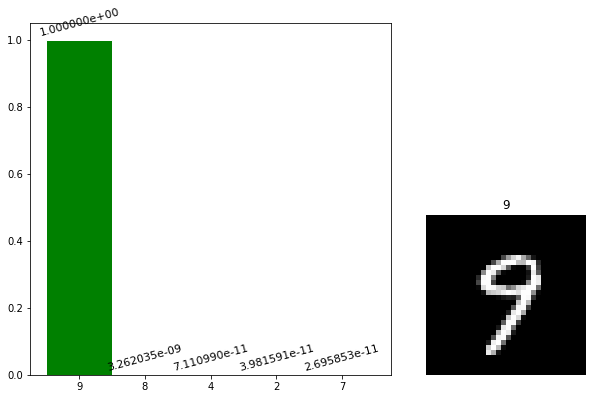

top 5:  TopKV2(values=array([[1.0000000e+00, 3.7677882e-12, 2.3879640e-12, 1.5361787e-12,
        4.6697092e-13]], dtype=float32), indices=array([[9, 4, 3, 7, 8]]))


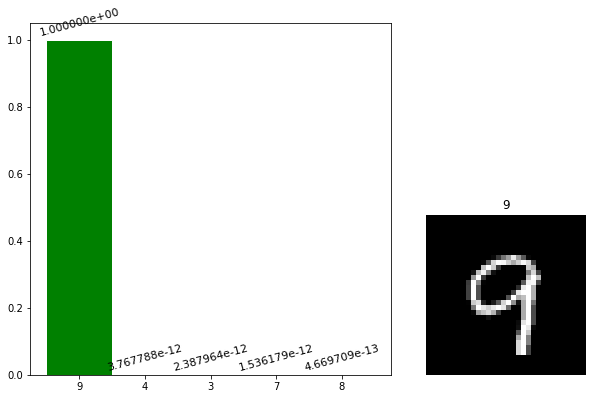

top 5:  TopKV2(values=array([[1.0000000e+00, 2.9389609e-08, 2.7322431e-08, 1.5517801e-09,
        1.5101388e-10]], dtype=float32), indices=array([[1, 4, 2, 7, 0]]))


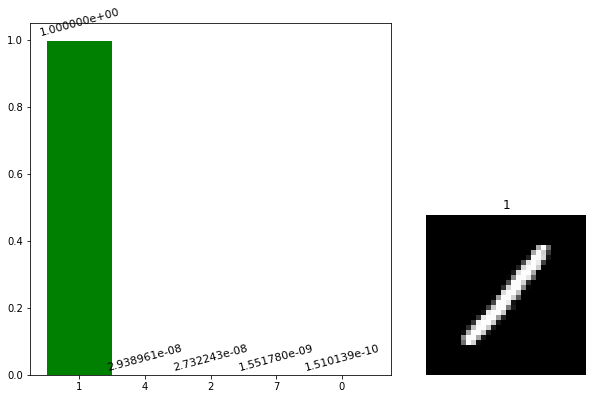

top 5:  TopKV2(values=array([[9.9999547e-01, 4.5574088e-06, 2.2838188e-11, 1.3011132e-13,
        2.0833041e-14]], dtype=float32), indices=array([[5, 3, 9, 8, 6]]))


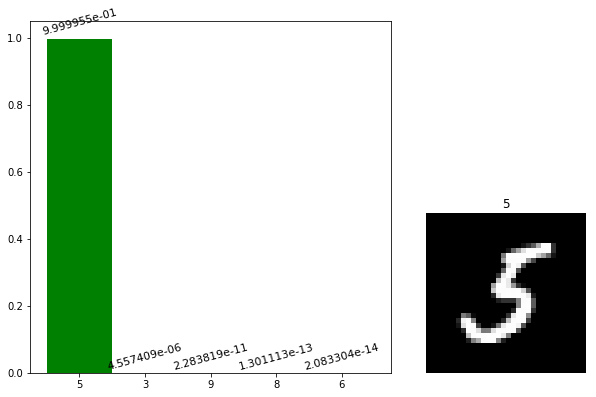

top 5:  TopKV2(values=array([[9.9999988e-01, 1.4831413e-07, 2.0543467e-10, 1.0799557e-10,
        9.3878030e-13]], dtype=float32), indices=array([[6, 0, 4, 8, 2]]))


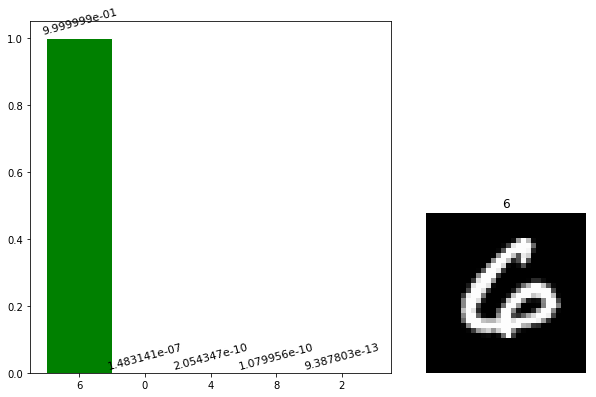

top 5:  TopKV2(values=array([[1.0000000e+00, 1.0188942e-09, 1.6693225e-13, 3.7199747e-15,
        3.3769351e-15]], dtype=float32), indices=array([[6, 0, 4, 7, 9]]))


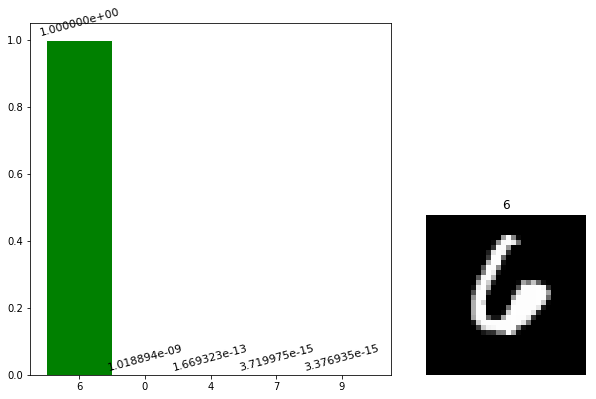

top 5:  TopKV2(values=array([[1.0000000e+00, 9.1472036e-10, 8.9437060e-12, 2.1611353e-15,
        6.0460868e-16]], dtype=float32), indices=array([[0, 7, 9, 2, 8]]))


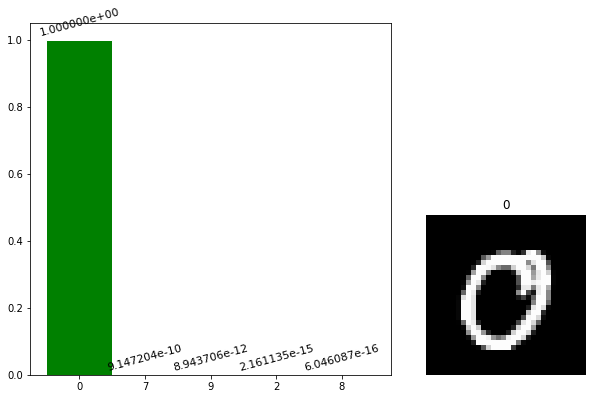

top 5:  TopKV2(values=array([[1.000000e+00, 6.207780e-12, 2.794219e-13, 6.941896e-14,
        9.102816e-15]], dtype=float32), indices=array([[6, 0, 8, 4, 5]]))


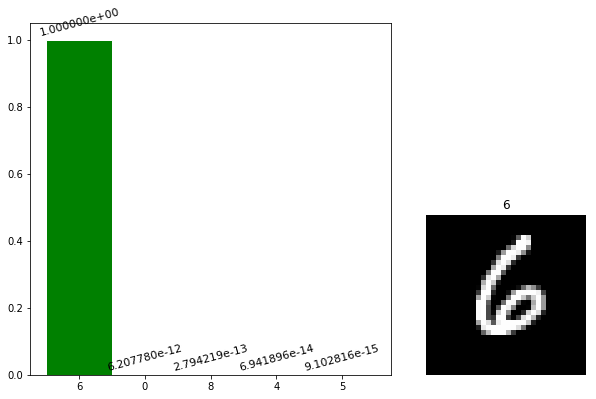

top 5:  TopKV2(values=array([[9.9999893e-01, 9.9776116e-07, 4.0172630e-08, 1.7761163e-08,
        1.5565579e-08]], dtype=float32), indices=array([[6, 1, 8, 2, 0]]))


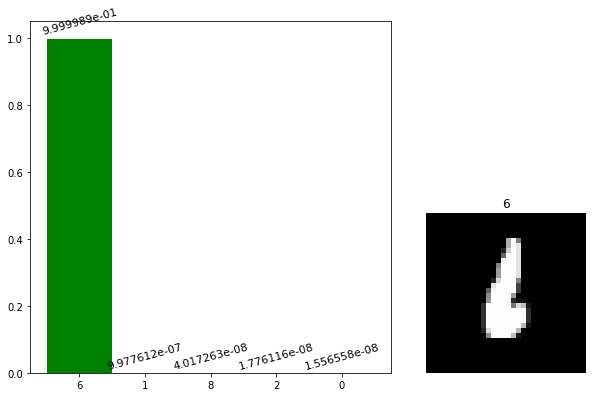

top 5:  TopKV2(values=array([[1.0000000e+00, 2.0935491e-12, 1.9701953e-12, 4.7346208e-14,
        4.2157602e-14]], dtype=float32), indices=array([[0, 9, 6, 8, 7]]))


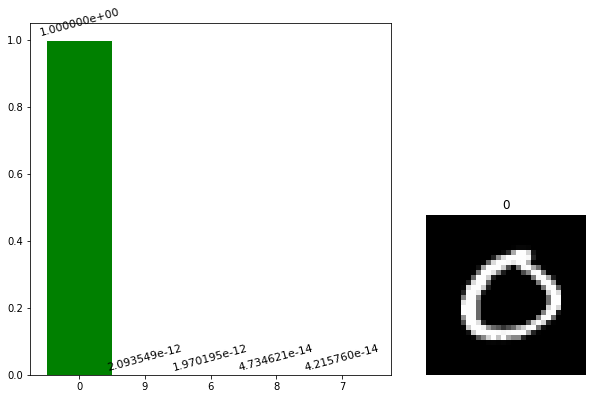

top 5:  TopKV2(values=array([[1.0000000e+00, 1.1785301e-16, 1.4822954e-17, 4.5944250e-18,
        4.6089925e-19]], dtype=float32), indices=array([[2, 8, 7, 0, 1]]))


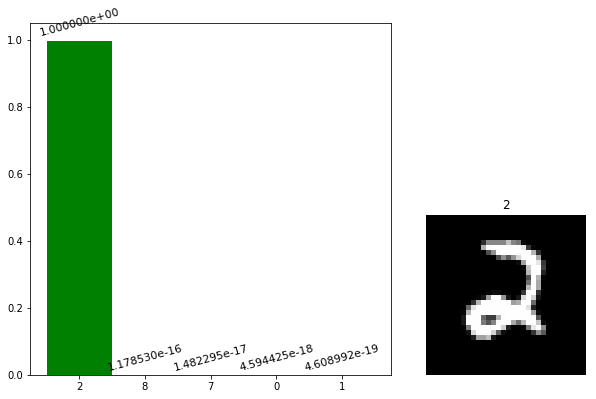

top 5:  TopKV2(values=array([[9.9999952e-01, 3.6380658e-07, 1.6620989e-07, 3.9899006e-10,
        3.6784093e-11]], dtype=float32), indices=array([[1, 4, 7, 2, 0]]))


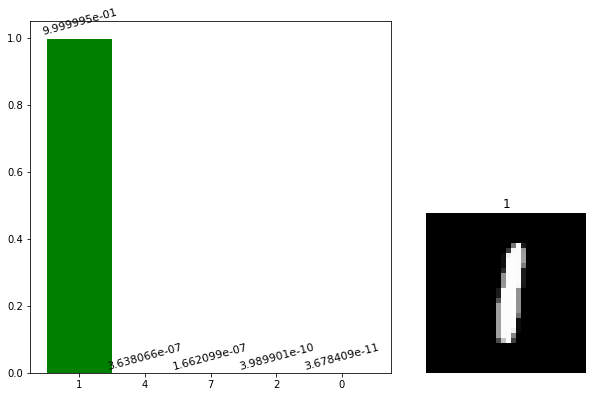

top 5:  TopKV2(values=array([[9.99989986e-01, 9.88323063e-06, 1.06635362e-07, 5.43396013e-08,
        1.04018474e-10]], dtype=float32), indices=array([[4, 6, 9, 0, 2]]))


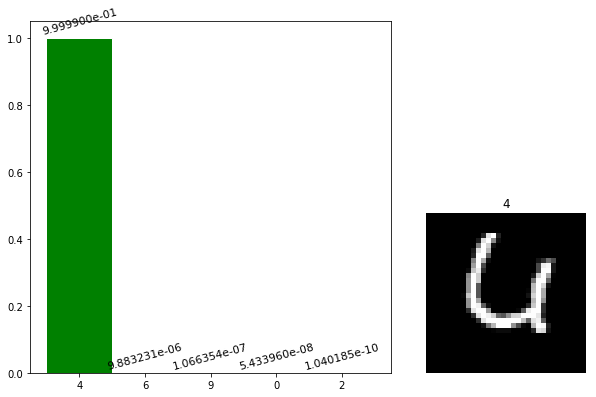

top 5:  TopKV2(values=array([[1.0000000e+00, 1.8791400e-10, 1.7728933e-11, 2.3298455e-12,
        7.4956029e-15]], dtype=float32), indices=array([[2, 7, 0, 8, 3]]))


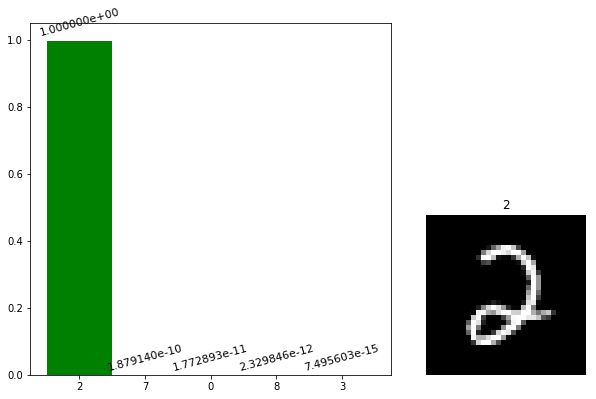

top 5:  TopKV2(values=array([[1.0000000e+00, 1.4875020e-12, 5.3108060e-13, 2.5403299e-13,
        2.0370081e-13]], dtype=float32), indices=array([[0, 2, 8, 9, 7]]))


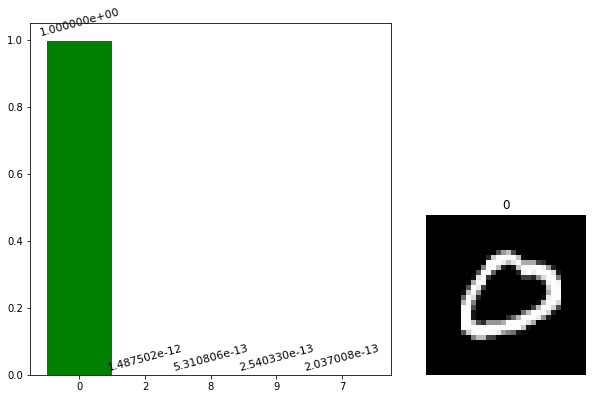

top 5:  TopKV2(values=array([[1.00000000e+00, 4.02346613e-14, 8.18021899e-15, 9.09589904e-17,
        1.06620324e-19]], dtype=float32), indices=array([[8, 9, 2, 3, 0]]))


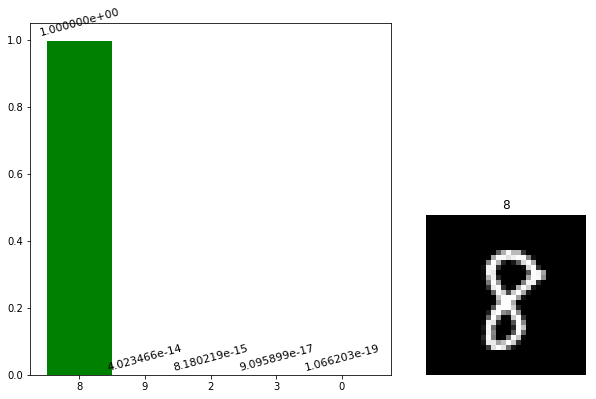

top 5:  TopKV2(values=array([[1.0000000e+00, 1.3987735e-08, 4.7730593e-09, 1.5092038e-09,
        3.2733893e-10]], dtype=float32), indices=array([[7, 2, 3, 8, 9]]))


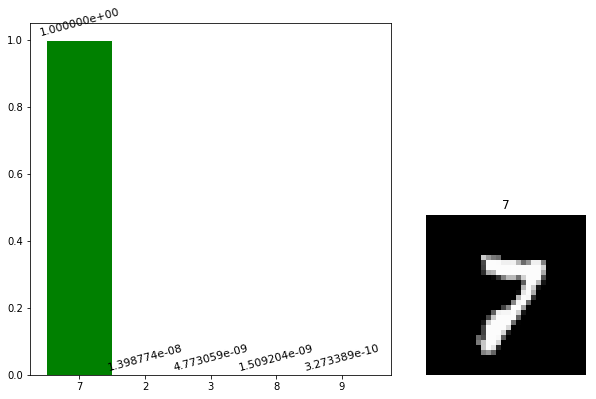

top 5:  TopKV2(values=array([[1.0000000e+00, 3.5341174e-13, 6.9045782e-14, 6.5381050e-15,
        4.1218800e-15]], dtype=float32), indices=array([[8, 3, 2, 9, 0]]))


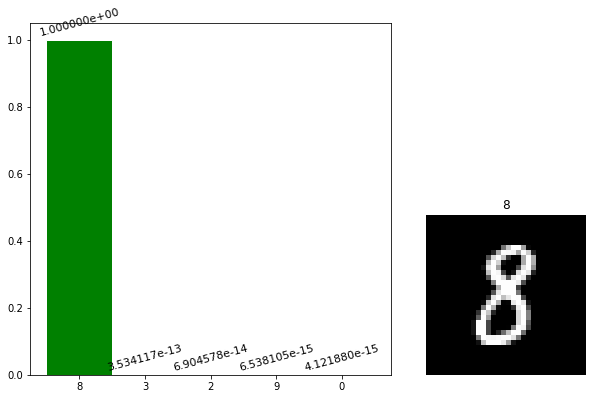

top 5:  TopKV2(values=array([[1.00000000e+00, 1.05998516e-10, 2.10317562e-11, 4.18130157e-14,
        1.50960795e-15]], dtype=float32), indices=array([[9, 4, 7, 5, 3]]))


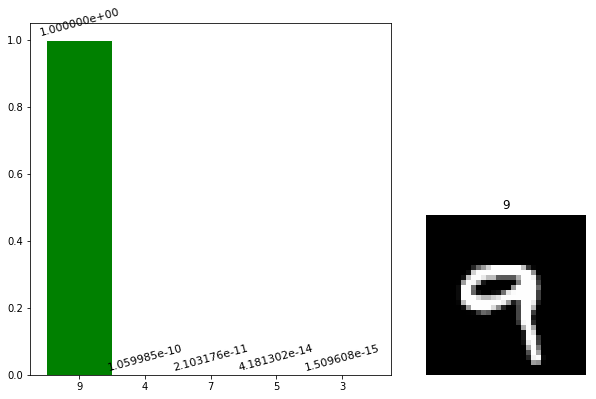

top 5:  TopKV2(values=array([[1.0000000e+00, 2.6293971e-12, 5.0167032e-13, 1.6048964e-14,
        9.8612067e-15]], dtype=float32), indices=array([[9, 4, 8, 3, 5]]))


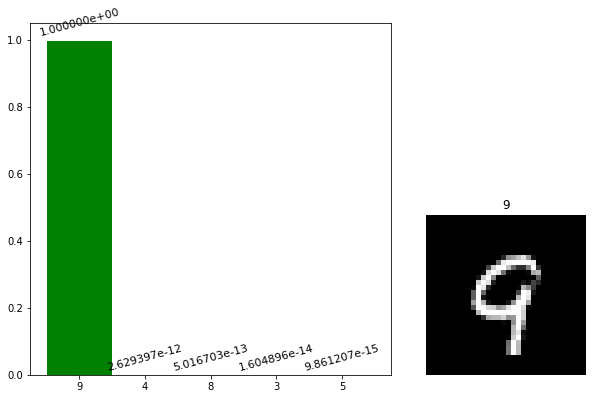

top 5:  TopKV2(values=array([[1.0000000e+00, 9.2639417e-11, 2.3166183e-12, 8.0852794e-13,
        2.9033050e-14]], dtype=float32), indices=array([[3, 9, 8, 5, 7]]))


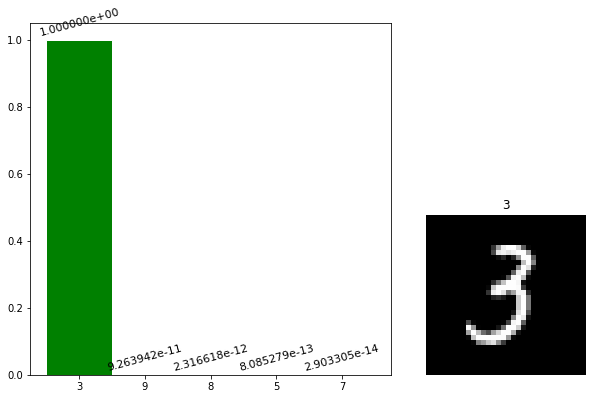

top 5:  TopKV2(values=array([[1.0000000e+00, 1.0657313e-12, 3.6630861e-14, 3.3648045e-14,
        5.0327023e-19]], dtype=float32), indices=array([[3, 5, 9, 8, 1]]))


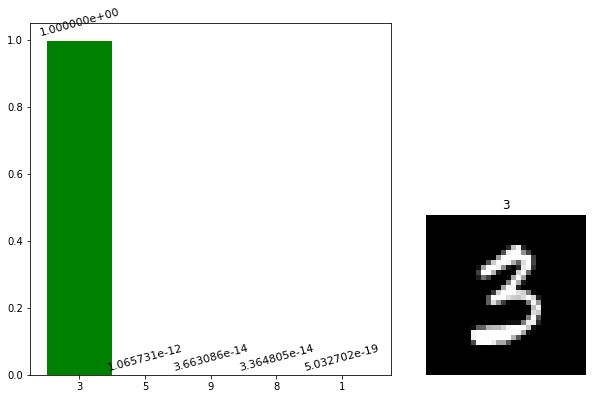

top 5:  TopKV2(values=array([[9.9999213e-01, 7.8548037e-06, 3.9085901e-10, 1.9271276e-11,
        9.4408674e-12]], dtype=float32), indices=array([[9, 4, 2, 8, 7]]))


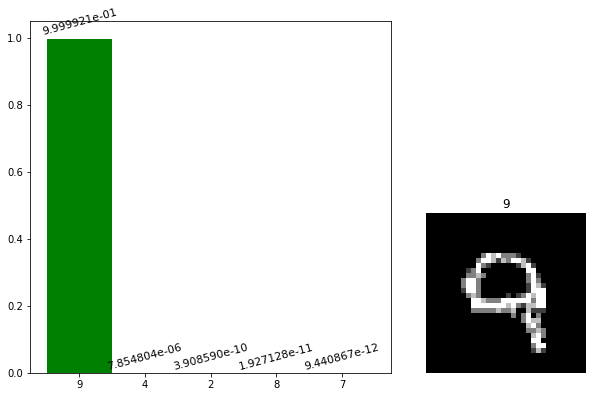

top 5:  TopKV2(values=array([[9.9999964e-01, 4.0797522e-07, 3.6496742e-10, 4.3936632e-11,
        2.3721075e-11]], dtype=float32), indices=array([[9, 4, 2, 8, 7]]))


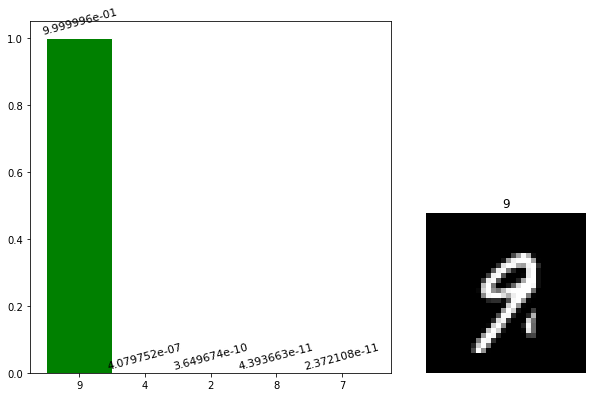

top 5:  TopKV2(values=array([[9.99999046e-01, 8.81885057e-07, 1.29104805e-07, 1.13017276e-08,
        6.25909116e-11]], dtype=float32), indices=array([[5, 8, 9, 6, 3]]))


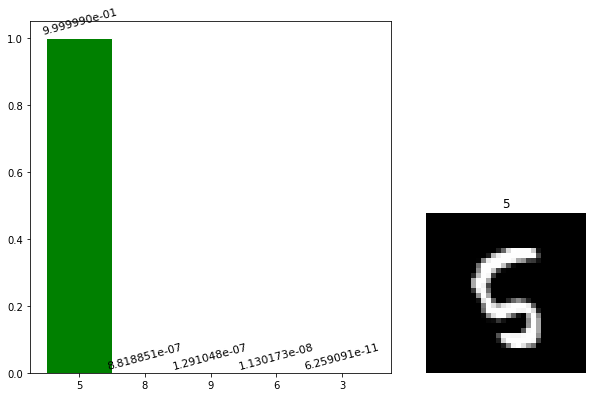

top 5:  TopKV2(values=array([[1.0000000e+00, 5.0208053e-11, 3.1761455e-11, 4.5361249e-12,
        3.9108764e-12]], dtype=float32), indices=array([[4, 1, 7, 8, 9]]))


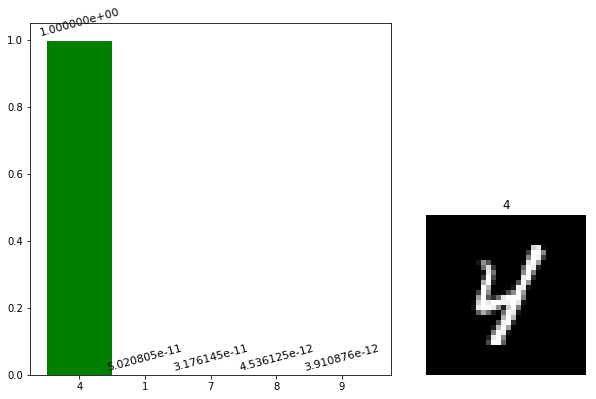

top 5:  TopKV2(values=array([[9.9999845e-01, 1.5910782e-06, 3.9254493e-09, 3.7497748e-11,
        9.5228530e-12]], dtype=float32), indices=array([[9, 7, 0, 8, 3]]))


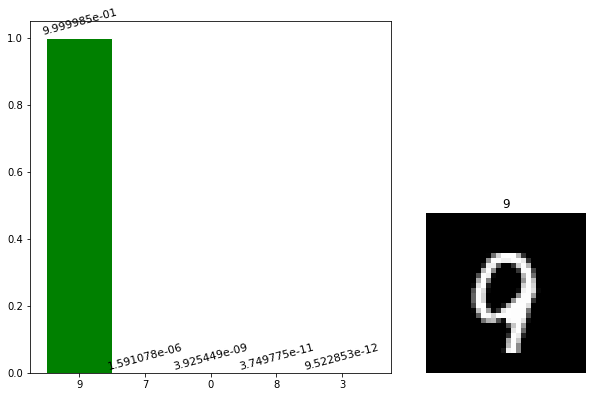

top 5:  TopKV2(values=array([[1.0000000e+00, 6.2945947e-11, 2.0779979e-12, 3.7360734e-15,
        1.6469918e-16]], dtype=float32), indices=array([[9, 7, 4, 3, 5]]))


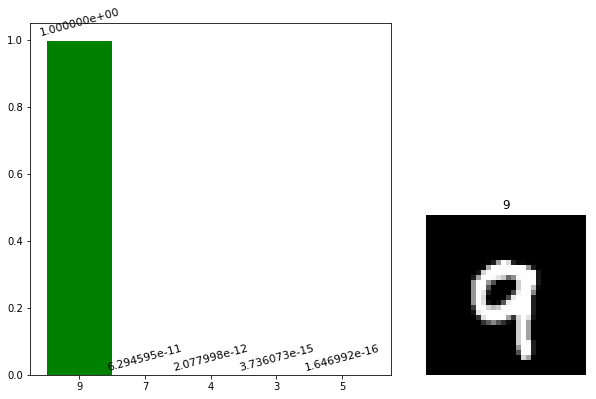

In [39]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    for i in range(len(images)):
        w = None
        w = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5),feed_dict={x:[images[i]]})
        print('top 5: ',w)
        name = []
        for j in range(len(w[1][0])):
            name.append(str(w[1][0][j]))
        label = range(0,15,3)
        plt.figure(figsize=(10,10))
        plt.subplot2grid((3,3), (0,0), colspan = 2, rowspan = 2)
        plt.bar(label, w[0][0], width = 3, fc = 'g', edgecolor = 'white', label='validation', lw=1)
        plt.xticks(label ,name)
        for a,b in zip(label,w[0][0]):  
            plt.text(a, b+0.005, '%e' % b, ha='center', va= 'bottom',fontsize=11, rotation=15)
        plt.subplot2grid((3,3), (1,2), colspan = 1, rowspan = 1).axis('off')
        plt.title(str(prediction[i]))
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.show()

## Visualize the Neural Network's State with Test Images

In [40]:
def outputFeatureMap(title,image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    sess = tf.Session()
    saver = tf.train.Saver()
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        if plt_num == 6:
            plt.subplot(2,3, featuremap+1) # sets the number of feature maps to show on each row and column
        if plt_num == 16:
            plt.subplot(4,4, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title(title + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [48]:
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    for a in range(5):
        print(prediction[a])
        print('layer1')
        outputFeatureMap(str(prediction[a])+' ',[images[a]], layer1,plt_num=6)
        plt.show()
        print('layer2')
        outputFeatureMap(str(prediction[a])+' ',[images[a]], layer2,plt_num=16)
        plt.show()

INFO:tensorflow:Restoring parameters from .\lenet
2
layer1


NameError: name 'layer1' is not defined